Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_job = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Job fake or not/fake_job_postings.csv")

In [3]:
df_job

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# Basic Info 

In [4]:
def get_basic_info(data):
    print("Data size is: ", data.size)
    print("Data shape is: ", data.shape)
    print(data.info())
    cat, num = list(), list()
    for i in data.columns:
        if data[i].dtype == object:
            cat.append(i)
        else:
            num.append(i)
    print(cat, "\n")
    print(num)
    return cat, num

In [5]:
categorical1, numerical1  = get_basic_info(df_job)

Data size is:  321840
Data shape is:  (17880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  ind

#### Lets see about null values

In [6]:
df_job.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

These are some serious nan values we have and these are in such a large quantity, that we cannot remove them. like in salary_range, more than half of the values are nan. The main thing which I saw that **categorical variables** are the only one with missing values. Now we will deal with missing categorical values

In [7]:
corr = df_job.corr()

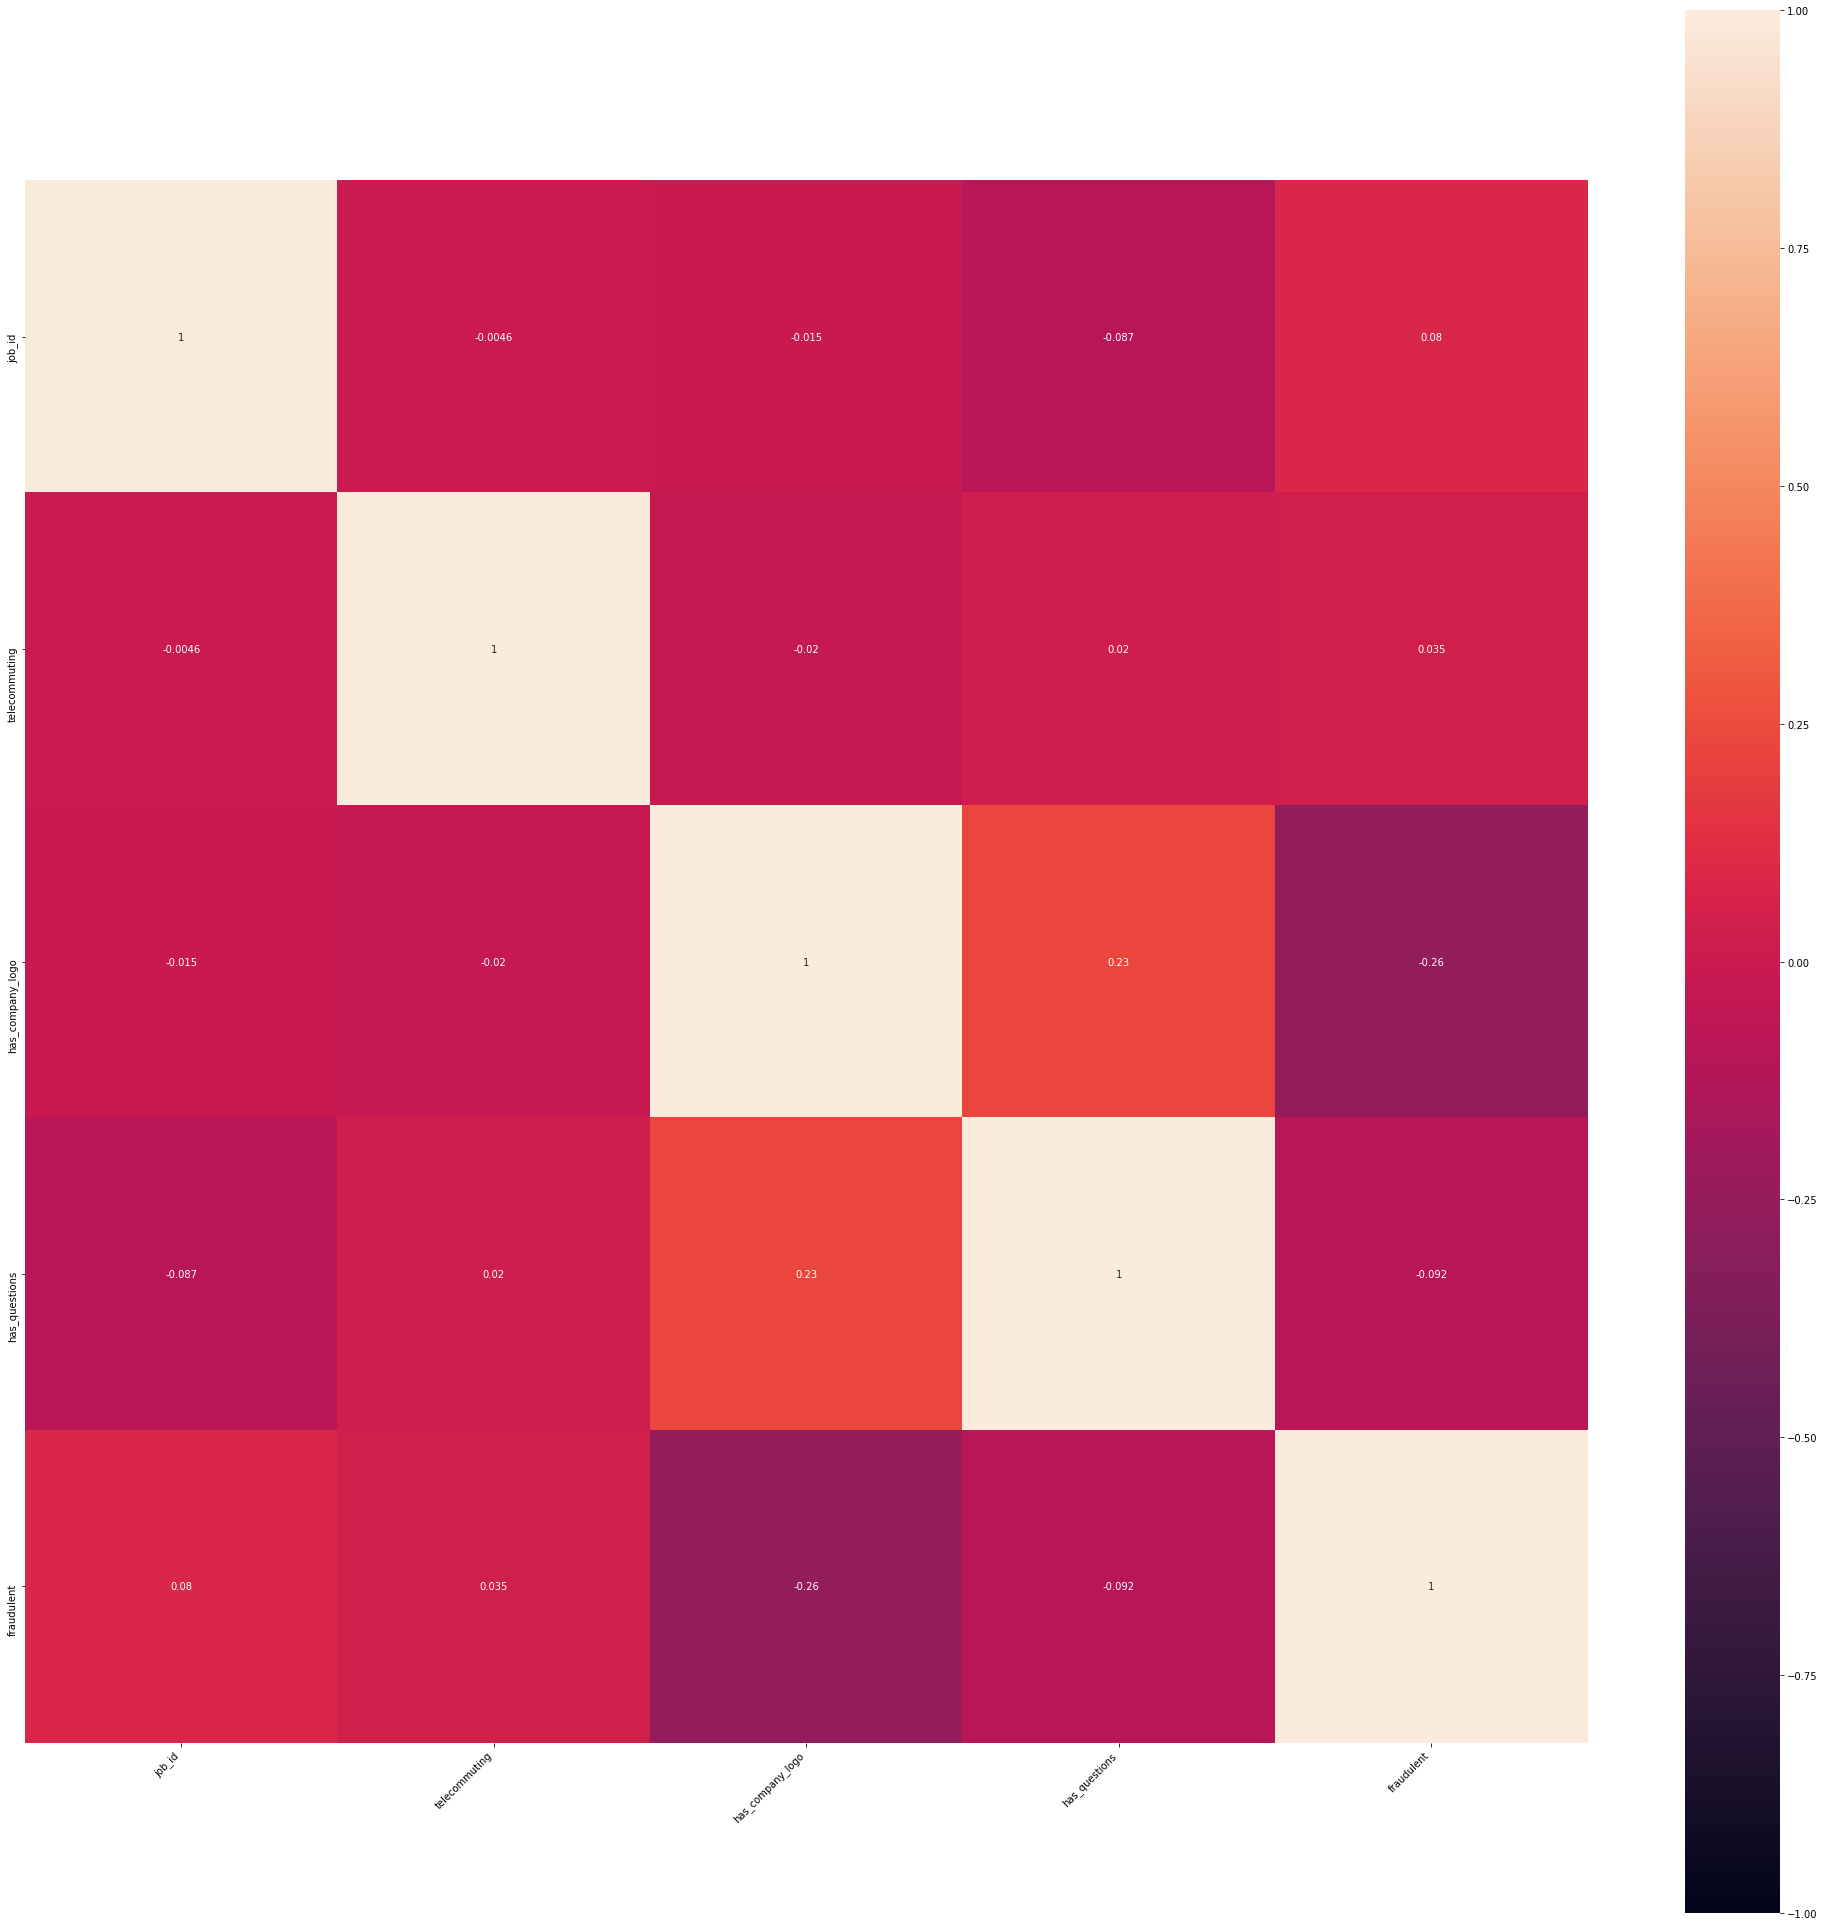

In [8]:
plt.figure(figsize=(35,35))
ax= sns.heatmap(corr, vmin = -1, vmax = 1, square = True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize=10)
plt.show()

We can see that company logo and fradulent have very less correlation so we are gonna drop it

In [9]:
df_job = df_job.drop(['has_company_logo'], axis = 1)

# Dealing with missing categorical values

#### First we will encode the categorical variables into numerical and then fill the nan values

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder

In [11]:
#encoder = OrdinalEncoder()
#imputer = SimpleImputer(ExtraTreesRegressor())
imputer = SimpleImputer(strategy="most_frequent", missing_values=np.nan)

In [12]:
categorical2, numerical2 = get_basic_info(df_job)

Data size is:  303960
Data shape is:  (17880, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  fun

In [13]:
"""def encoding(data):
    non_nulls = np.array(data.dropna())  # retains only non-null values
    impute_reshape = non_nulls.reshape(-1,1)  # reshapes the data for encoding
    impute_ordinal = encoder.fit_transform(impute_reshape)  # endoce data
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)  # #Assign back encoded values to non-null values
    return data"""

'def encoding(data):\n    non_nulls = np.array(data.dropna())  # retains only non-null values\n    impute_reshape = non_nulls.reshape(-1,1)  # reshapes the data for encoding\n    impute_ordinal = encoder.fit_transform(impute_reshape)  # endoce data\n    data.loc[data.notnull()] = np.squeeze(impute_ordinal)  # #Assign back encoded values to non-null values\n    return data'

In [14]:
"""for columns in categorical2:
    encoding(df_job[columns])"""

'for columns in categorical2:\n    encoding(df_job[columns])'

In [15]:
df_job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [16]:
#knn_imputer = KNNImputer(n_neighbors=7)

In [17]:
encode_data = pd.DataFrame(imputer.fit_transform(df_job),columns = df_job.columns)

In [18]:
encode_data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,0-0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0-0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,0-0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0-0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,0-0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,0-0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,0-0,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Sales,0-0,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,See job description,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
17878,17879,Graphic Designer,"NG, LA, Lagos",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [19]:
encode_data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [20]:
encode_data[encode_data['fraudulent'] == 1]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,The group has raised a fund for the purchase o...,University degree required. TEFL / TESOL / CEL...,See job description,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,0-0,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,Sales Executive,Sales Executive,Sales Executive,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,Student Positions Part-Time and Full-Time.You ...,University degree required. TEFL / TESOL / CEL...,See job description,0,0,Part-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1
17828,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,0-0,We help teachers get safe &amp; secure jobs ab...,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1
17829,17830,Android Developer,"PL, MZ, Warsaw",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1
17830,17831,Payroll Clerk,"US, NY, New York",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Apparel & Fashion,Accounting/Auditing,1


In [21]:
categorical3, numerical3 = get_basic_info(encode_data)

Data size is:  303960
Data shape is:  (17880, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  object
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  fun

In [22]:
numerical2

['job_id', 'telecommuting', 'has_questions', 'fraudulent']

We can see that all the numerical values have also been changed into object, we need to get them back

In [23]:
encode_data['job_id'] = encode_data['job_id'].astype('int64')

In [24]:
encode_data['telecommuting'] = encode_data['telecommuting'].astype('int64')

In [26]:
encode_data['has_questions'] = encode_data['has_questions'].astype('int64')

In [27]:
encode_data['fraudulent'] = encode_data['fraudulent'].astype('int64')

In [28]:
categorical3, numerical3 = get_basic_info(encode_data)

Data size is:  303960
Data shape is:  (17880, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17880 non-null  object
 3   department           17880 non-null  object
 4   salary_range         17880 non-null  object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  fun

We are all set, now lets make dummies so that we can move ahead

In [29]:
def making_new_df(data, columnlist):
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        #print(dummy)
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

In [30]:
encode_data2 = making_new_df(encode_data, categorical3)

In [31]:
encode_data2.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,Project Management,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training
0,1,Marketing Intern,"US, NY, New York",Marketing,0-0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0-0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,0-0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0-0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,0-0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
encode_data2 = encode_data2.drop(categorical3, axis = 1)

In [33]:
encode_data2.head()

,job_id,telecommuting,has_questions,fraudulent,Electrician,Environmental Technician I,Piping Material Engineer,"Discipline Manager Civil, Structural, Marine, Architectural",FEA Senior engineer,Manager of Project Management Organization - Engineering,...,Project Management,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
encode_data2 = encode_data2.drop(['job_id'], axis = 1)

In [35]:
encode_data2.head()

,telecommuting,has_questions,fraudulent,Electrician,Environmental Technician I,Piping Material Engineer,"Discipline Manager Civil, Structural, Marine, Architectural",FEA Senior engineer,Manager of Project Management Organization - Engineering,Mechanical Engineering Manager,...,Project Management,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Lets split our model

In [36]:
from sklearn.model_selection import train_test_split

In [51]:
y = encode_data2.loc[:, 'fraudulent']

In [52]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [54]:
X = encode_data2.drop(['fraudulent'], axis = 1)

In [55]:
X

,telecommuting,has_questions,Electrician,Environmental Technician I,Piping Material Engineer,"Discipline Manager Civil, Structural, Marine, Architectural",FEA Senior engineer,Manager of Project Management Organization - Engineering,Mechanical Engineering Manager,"Resources Change Management, Process Excellence and Change Enablement Manager",...,Project Management,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17876,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.30, random_state=42)

#### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
LR = LogisticRegression(max_iter=5000)

In [59]:
model_lr = LR.fit(train_x, train_y)

MemoryError: Unable to allocate 4.79 GiB for an array with shape (12516, 51412) and data type float64